In [ ]:
!git clone https://github.com/geneexpressionpolito/Transformers-for-gene-expression-prediction-from-raw-dna-sequences.git
!mv ./Transformers-for-gene-expression-prediction-from-raw-dna-sequences/Classes ./
!pip install import-ipynb
!gdown --folder 1u34ntvh4dL5Y5_hZSA9EDs5SZ32MPda1
import import_ipynb
import os

Mounted at /content/drive


In [ ]:
from Classes.DataManager import DataManager
from Classes.TF_net import projTFNet
from tensorflow import keras
import numpy as np
import h5py

%load_ext tensorboard

importing Jupyter notebook from DataManager.ipynb
importing Jupyter notebook from TF_net.ipynb
Populating the interactive namespace from numpy and matplotlib


data loading takes at most 17s

In [ ]:
dm = DataManager(transformer=False, micro=True)
X_trainhalflife, X_trainpromoter, y_train, _, X_traintf, X_trainmicro               = dm.get_train(True, False, True)
X_validationhalflife, X_validationpromoter, y_validation, _, X_validtf, X_valmicro  = dm.get_validation(True, False, True)
X_testhalflife, X_testpromoter, y_test, _, X_testtf, X_testmicro                    = dm.get_test(True, False, True)

Preprocessing-> Padding

In [ ]:
leftpos  = 3_000          #3_000 
rightpos = 13_500         #13_500

maxlen   = rightpos-leftpos
print("maxlen: ",maxlen)

maxlen:  10500


In [ ]:
X_trainpromoter_p         = X_trainpromoter[:, leftpos:rightpos, :]
X_validationpromoter_p = X_validationpromoter[:, leftpos:rightpos, :]
X_testpromoter_p          = X_testpromoter[:, leftpos:rightpos, :]

model built
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 181)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                11648     
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 130       
_________________________________________________________________
dropout_17 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 3         
Total params: 11,781
Trainable params: 11,781
Non-trainable params: 0
___________________________________________

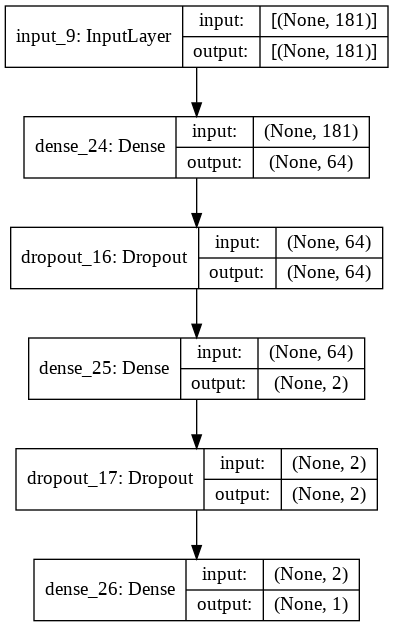

Epoch 1/400

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
79/79 [==============================] - 1s 10ms/step - loss: 0.9423 - val_loss: 0.7655

Epoch 00001: val_loss improved from inf to 0.76550, saving model to checkpoint/tf1/bestmodel_CNN1D_TF
INFO:tensorflow:Assets written to: checkpoint/tf1/bestmodel_CNN1D_TF/assets
Epoch 2/400

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
79/79 [==============================] - 0s 3ms/step - loss: 0.7437 - val_loss: 0.6955

Epoch 00002: val_loss improved from 0.76550 to 0.69550, saving model to checkpoint/tf1/bestmodel_CNN1D_TF
INFO:tensorflow:Assets written to: checkpoint/tf1/bestmodel_CNN1D_TF/assets
Epoch 3/400

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0005000000237487257.
79/79 [==============================] - 0s 3ms/step - loss: 0.6692 - val_loss: 0.6252

Epoch 00003: val_loss improved from 0.69550 to 0.62516, saving model to checkpoint/t

In [ ]:
# # Clear any logs from previous runs
#!rm -rf ./logs/Xpresso_TF-006/
# maxlen=18850
model_type="TF"
checkpoint_dir="tf1/"
logdir = None #f"{model_type}_0-006"
net = projTFNet(shuffle=True, checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=400, batch_size=128, learning_rate=5e-4, CNN_input=(maxlen, 4), logdir=logdir)
net.train_model([X_traintf], y_train, [X_validtf], y_validation)

In [ ]:
net.evaluate([X_testtf], y_test)

Test R^2 = 0.661


In [ ]:
net.evaluate_best([X_testtf], y_test)

Test R^2 = 0.658
